In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

In [8]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('fcc-forum-pageviews.csv')
df.set_index('date', inplace = True)
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [9]:
# Clean data
df = df[df['value'] >= df['value'].quantile(0.025)]
df = df[df['value'] <= df['value'].quantile(0.975)]
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


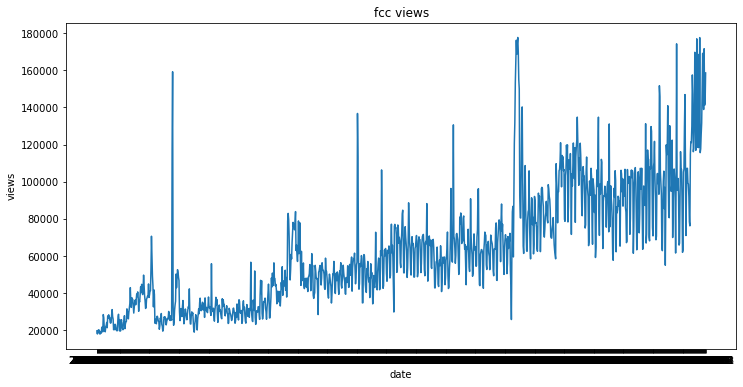

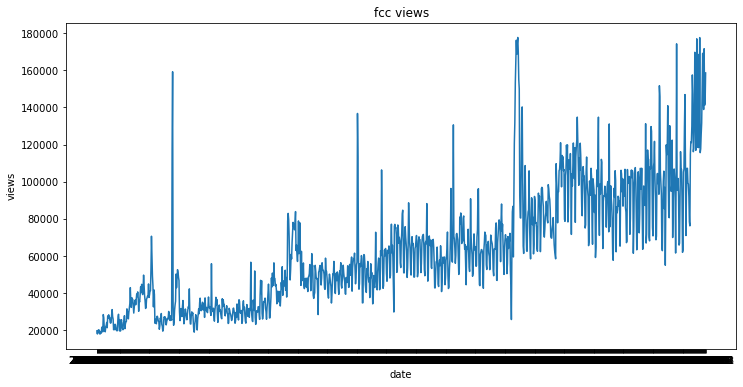

In [11]:
def draw_line_plot():
    # Draw line plot
    fig, ax = plt.subplots(figsize=(12,6))
    plt.plot(df.index, df['value'])
    plt.title('fcc views')
    plt.xlabel('date')
    plt.ylabel('views')
    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig
draw_line_plot()

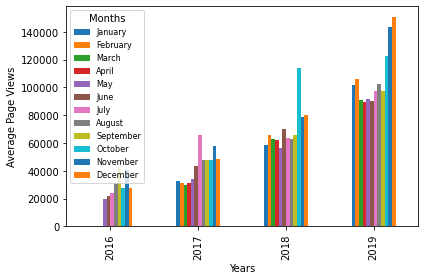

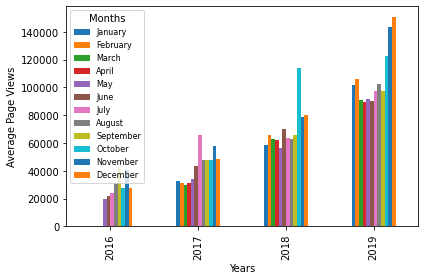

In [15]:
def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = df.copy()
    df_bar['year']  = pd.DatetimeIndex(df_bar.index).year
    df_bar['month'] = pd.DatetimeIndex(df_bar.index).month

    df_bar = df_bar.groupby(['year', 'month'])['value'].mean().unstack()
    
    # Draw bar plot
    months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
    fig = df_bar.plot.bar()
    fig.legend(months, title='Months', prop={'size': 8})
    plt.xlabel("Years")
    plt.ylabel("Average Page Views")
    plt.tight_layout()
    fig = fig.figure
    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig
draw_bar_plot()

In [14]:
df_bar = df.copy()
df_bar['year']  = pd.DatetimeIndex(df_bar.index).year
df_bar['month'] = pd.DatetimeIndex(df_bar.index).month
df_bar

,value,year,month
date,,,
2016-05-19,19736,2016,5
2016-05-26,18060,2016,5
2016-05-27,19997,2016,5
2016-05-28,19044,2016,5
2016-05-29,20325,2016,5
...,...,...,...
2019-11-24,138875,2019,11
2019-11-29,171584,2019,11
2019-11-30,141161,2019,11


In [18]:
def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]
    df_box['monum'] = df_box['date'].dt.month
    df_box = df_box.sort_values('monum')

    # Draw box plots (using Seaborn)
    fig, ax = plt.subplots(ncols=2, figsize=(14,6))

    sns.boxplot(ax=ax[0], x='year', y='value', data=df_box).set(xlabel="Year", ylabel="Page Views", title="Year-wise Box Plot (Trend)")
    sns.boxplot(ax=ax[1], x='month', y='value', data=df_box).set(xlabel="Month", ylabel="Page Views", title="Month-wise Box Plot (Seasonality)")

    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig
draw_box_plot()

AttributeError: 'str' object has no attribute 'year'